In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
#from fastai.vision.widgets import *

In [3]:
key = open('azurekey.txt').readline().strip('\n')
print(key)

32a395749721415f8aedf5a0ef7ca0d2


In [3]:
catPositions = ['loaf', 'curled up', 'belly up', 'stretching', 'contortionist']
catPath = Path('catPics')

In [5]:
if not catPath.exists():
    catPath.mkdir()
    for i in catPositions:
        dest = (path/i)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'cat \"{i}\"') #search terms for the different cat positions (eg cat "loaf")
        download_images(dest, urls=results.attrgot('contentUrl'))

In [4]:
catFiles = get_image_files(catPath)
catFiles

(#617) [Path('catPics/belly up/00000001.jpg'),Path('catPics/belly up/00000002.jpg'),Path('catPics/belly up/00000003.jpg'),Path('catPics/belly up/00000005.jpg'),Path('catPics/belly up/00000006.jpg'),Path('catPics/belly up/00000007.jpg'),Path('catPics/belly up/00000008.jpg'),Path('catPics/belly up/00000010.jpg'),Path('catPics/belly up/00000011.jpg'),Path('catPics/belly up/00000012.jpg')...]

In [5]:
failed = verify_images(catFiles)
failed

(#0) []

In [6]:
failed.map(Path.unlink)

(#0) []

In [7]:
cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42), #TODO: make a splitter that splits it 3 ways, valid, test, and train without using GrandParent
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.3),
    batch_tfms=aug_transforms())

In [8]:
catDls = cats.dataloaders(catPath)

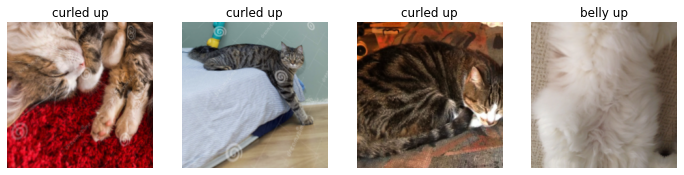

In [9]:
catDls.train.show_batch(max_n=4, nrows=1, unique=False)

In [10]:
catLearn = cnn_learner(catDls, resnet34, metrics=error_rate) #create the learner to train the model with
catLearn.recorder #initialize the recorder associated with the learner to plot loss later


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/itprentice/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Recorder

In [11]:
catLearn.fine_tune(9) #fine tuning for head setup + 8 epochs
#choose 8 epochs because it is the point where train loss and valid loss are the most similar

epoch,train_loss,valid_loss,error_rate,time
0,2.477257,1.598348,0.617886,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.948926,1.242731,0.504065,00:12
1,1.707259,1.017799,0.398374,00:12
2,1.492608,0.843692,0.308943,00:13
3,1.303428,0.781718,0.308943,00:13
4,1.155995,0.816709,0.284553,00:12
5,1.023554,0.783401,0.243902,00:12
6,0.906625,0.755924,0.252033,00:14
7,0.810671,0.743785,0.252033,00:15
8,0.741051,0.740261,0.268293,00:15


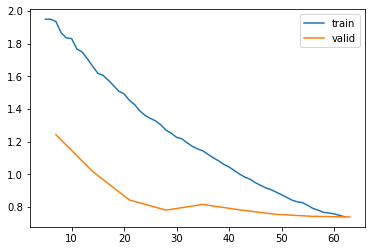

In [12]:
catLearn.recorder.plot_loss() #i believe this plots loss vs # batches processed

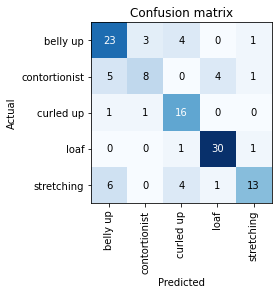

In [13]:
interp = ClassificationInterpretation.from_learner(catLearn)
interp.plot_confusion_matrix()

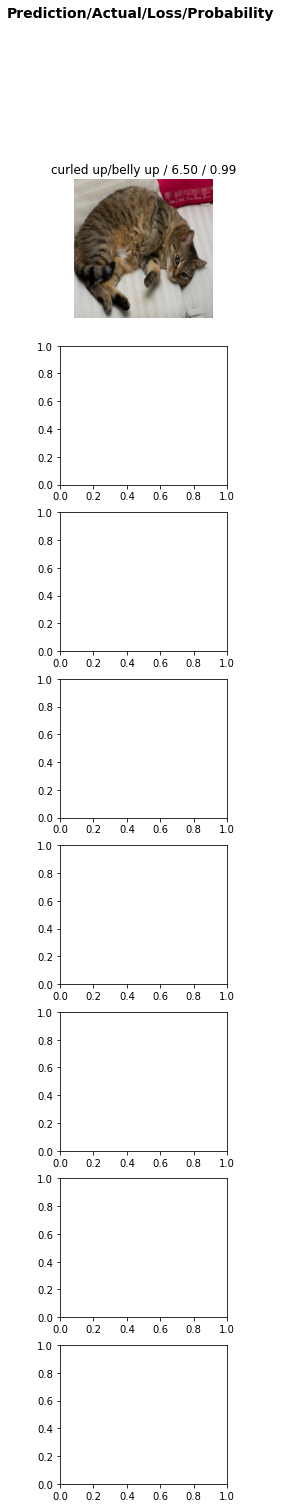

In [14]:
interp.plot_top_losses(8, nrows=8)

In [15]:
catLearn.export(fname='catexport.pkl')
#catLearn.save('catsave.pkl') the save file is too big to upload to github

In [18]:
learn_inf = load_learner('catexport.pkl')